# Multivariate Linear Regression on Boston dataset

### Importing required libraries and CSV file in Pandas Dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
df.shape[1]


14

## Finding Correlation between features

In [3]:
target=df['MEDV'] #extracting target variable
target
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Only Keeping the features with high correlation with target

In [4]:
X=df
X.drop(['RAD','B','DIS','CHAS','ZN','CRIM','TAX','MEDV','INDUS','NOX','PTRATIO','AGE'],axis=1,inplace=True)
X


,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


### Only kept no of room(RM) and % lower status of the population(LSTAT)

## Splitting Train and Test data

In [5]:
X.shape[1]
train=X.iloc[:300,:]
test=X.iloc[300:,:]
target_train=target.iloc[:300]
ytrue=target.iloc[300:]

## Inserting 1s in train data 

This is required since intercept(theta0) will also be calculated together with other weights.

In [6]:
ones = np.ones((train.shape[0],1))
train = np.hstack((ones,train))
ones = np.ones((test.shape[0],1))
test = np.hstack((ones,test))
print(train.shape)

(300, 3)


## Building Model 

In [7]:
def model(X,Y,lr=.0001,itr=3000):
    n=X.shape[1];
    theta=np.ones(n)
    err_list=[]
    
    for i in range (itr):
        h=np.dot(X,theta)
        e=np.sum(np.square(h-Y))
        err_list.append(e/X.shape[0])
        grad = (np.dot(X.T,(h-Y))/X.shape[0])
        theta = theta - lr*grad
        
    return theta,err_list

        

## Calling Model

In [8]:
theta,err_list=model(train,target_train)

## Printing the parameters

In [9]:
theta

array([ 1.43462609,  4.76132763, -0.60958751])

### Error Plot

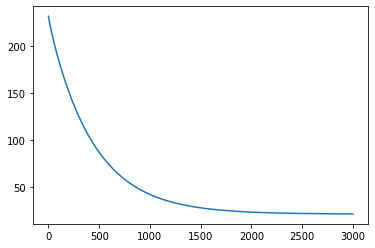

In [10]:
plt.plot(err_list)

## Getting Prediction

In [11]:
ypred=np.dot(test,theta)

In [12]:
ypred

array([30.44951206, 27.02069385, 27.07432536, 31.71562031, 31.66315139,
       27.49195325, 32.81964592, 29.45476509, 30.25850762, 23.79168725,
       17.40752232, 26.93814054, 22.96773683, 26.45336371, 27.04529257,
       21.58774389, 18.41937871, 19.2477976 , 25.50609245, 22.78057293,
       27.64188738, 27.60498488, 25.5039825 , 21.45572688, 28.24786729,
       28.95801953, 27.73916292, 22.60115785, 23.29650918, 27.11374166,
       25.14707261, 21.02558884, 25.37712284, 28.04471435, 27.36388776,
       25.29596506, 23.40490038, 23.0654084 , 25.09592051, 23.99378964,
       24.18716145, 32.56476403, 27.30077685, 28.93963759, 31.3537938 ,
       23.65029401, 21.79346274, 28.58246038, 29.37460574, 30.88300809,
       28.69030911, 29.41276515, 24.70159118, 30.72569459, 23.49084503,
       26.30246448, 20.28325322, 23.79409007, 23.6092159 , 22.81238686,
       27.14891358, 22.54763839, 20.75316815, 20.14024924, 40.01436475,
       14.04945074, 16.53087003, 11.70183327, 23.11116913, 30.98

## Calculating MSE

In [13]:
MSE = np.square(np.subtract(ypred,ytrue)).mean()

In [14]:
MSE

47.340435510898544

# Closed Form

In [15]:
def normal(X, Y):
    theta = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y))
    return theta

In [16]:
w=normal(train,target_train)

#### Printing parameters from closed form

In [17]:
w

array([-36.37478967,   9.99214379,  -0.21425652])

### Calculating MSE for Closed Form

In [18]:
MSE = np.square(np.subtract(np.dot(test,w),ytrue)).mean()

In [19]:
MSE

77.77401808489346

# Result

### MSE from Multivariate : 47.34
### MSE from Closed Form: 77.77